<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

pd.options.mode.chained_assignment = None 

# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

data = pd.read_csv('./T1_data/2022-task1_data.csv')
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

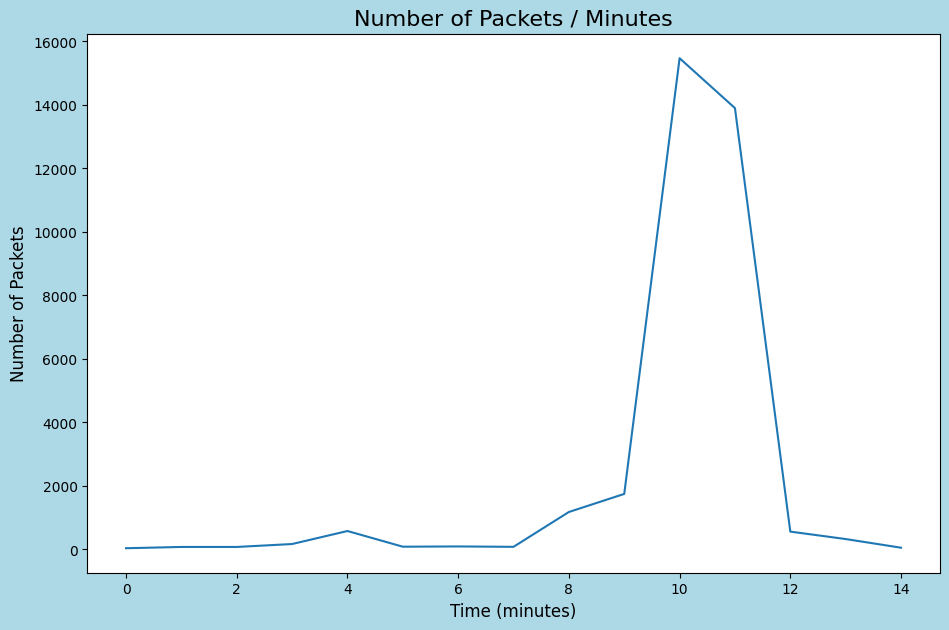

In [2]:
# Retrieving data from dataframe
task1data = data[["Time", "No."]]

# Changing time from seconds to minutes and rounding to nearest minute
task1data["Time"] = (task1data["Time"]/60).round()

# Grouping task1data by time and total count of rows for each minute value (changes minutes to index and adds up total packet count)
task1data = task1data.groupby(["Time"]).count()

# Creating figure, defining size and bg color
plt.figure(figsize=(11,7), facecolor="lightblue")

# Plotting data (index values = time, task1data values = count)
plt.plot(task1data.index.values.tolist(), task1data.values.tolist())

# Creating labels, setting size and showing graph
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Number of Packets", fontsize=12)
plt.title("Number of Packets / Minutes", fontsize=16)
plt.show()

### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

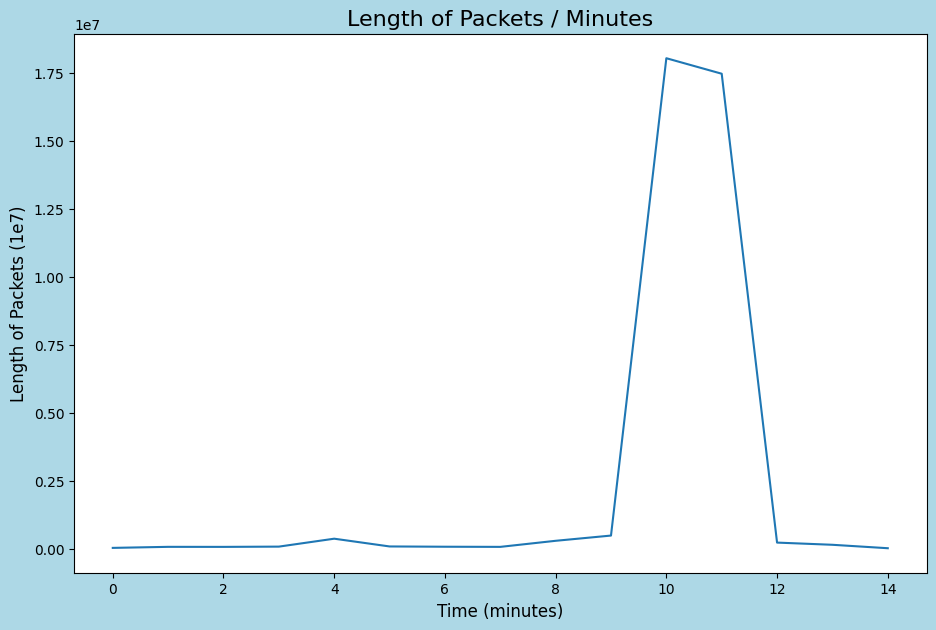

In [3]:
# Retrieving data for task 2
task2data = data[["Time", "Length"]]

# Changing seconds to minutes and rounding to nearest minute
task2data["Time"] = (task2data["Time"]/60).round()

# Grouping data by time and calculating sum of lengths for values column
task2data = task2data.groupby(["Time"]).sum()

# Creating figure, defining size and bg color
plt.figure(figsize=(11,7), facecolor="lightblue")
        
# Plotting data 
plt.plot(task2data.index.values.tolist(), task2data["Length"])

# Creating labels and setting size
plt.title("Length of Packets / Minutes", fontsize=16)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Length of Packets (1e7)", fontsize=12)
plt.show()

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

SMB         16301
TCP         11885
ARP          4500
LLMNR         614
NBNS          573
SSDP          324
HTTP           85
DHCPv6         57
ICMPv6         47
HTTP/XML       28
SMB2           13
SMB Pipe       12
BROWSER        11
NBSS            8
IGMPv3          8
LANMAN          4
Name: Protocol, dtype: int64


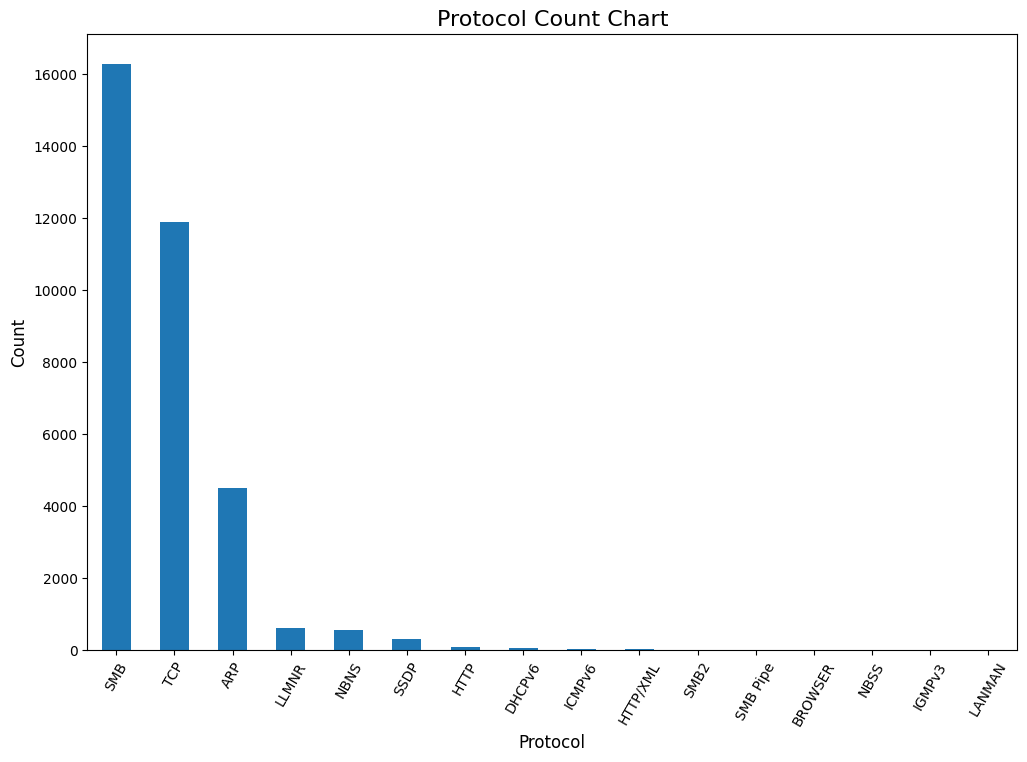

In [4]:
# Retrieving data from dataframe
task3data = data

# Taking count and plotting
print(task3data["Protocol"].value_counts())
task3data["Protocol"].value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(12,8))

# Setting Labels
plt.title("Protocol Count Chart", fontsize=16)
plt.xlabel("Protocol", fontsize=12)
plt.xticks(rotation=60, horizontalalignment="center")
plt.ylabel("Count", fontsize=12)

plt.show()

### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

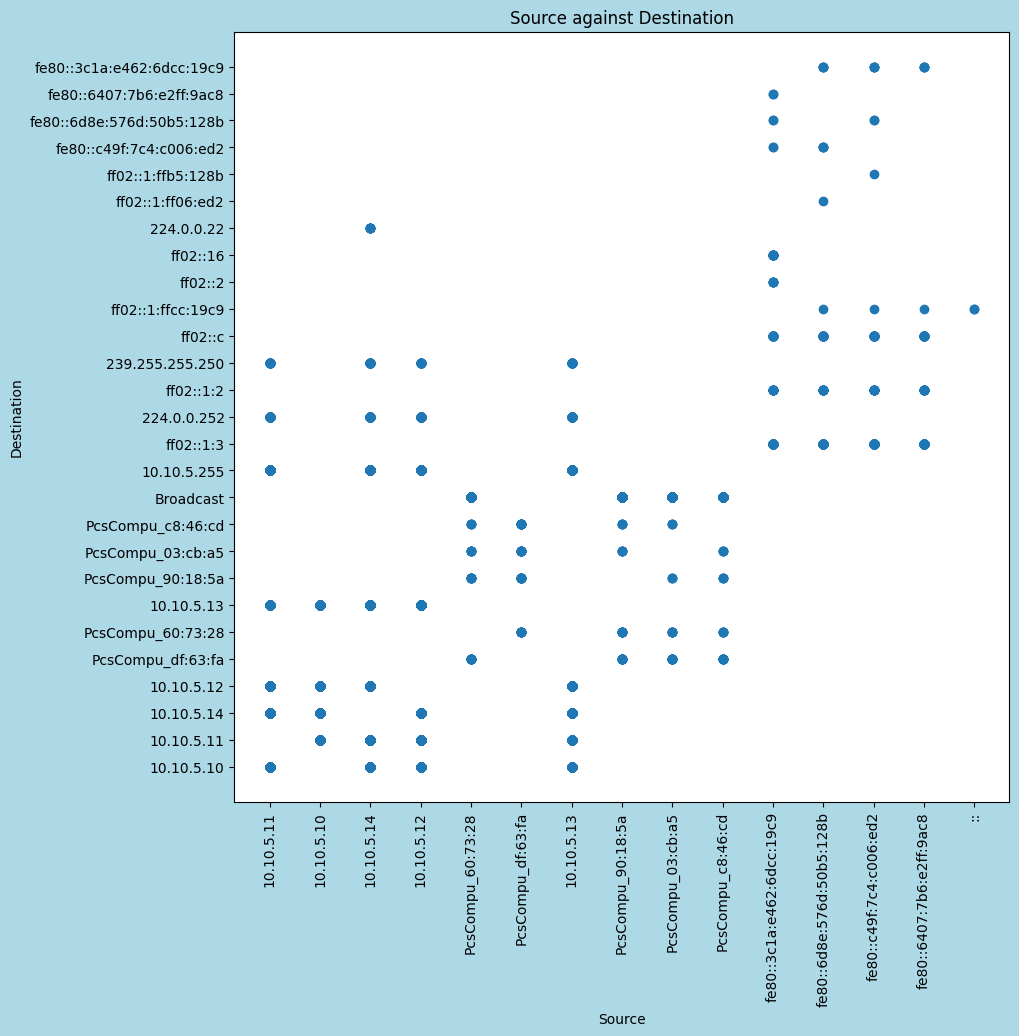

In [5]:
# Retrieving data from dataframe
task4data = data[["Source", "Destination"]]

# Creating figure, defining size and bg color
plt.figure(figsize=(10,10), facecolor="lightblue")

# Creating scatter plot
plt.scatter(task4data["Source"], task4data["Destination"])

# Setting titles and labels
plt.title("Source against Destination")
plt.xlabel("Source")
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylabel("Destination")

plt.show()

### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

In [6]:
# Retrieve dataframe including source from original data
task5data = data

# Change dataframe to only include specific values which start with 10.
task5data = task5data[task5data["Source"].str.startswith("10.")]

# Print the number that start with 10. against total to check if the code worked
print((task5data["Source"].str.startswith("10.").count()))
print(len(task5data))

29397
29397


### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

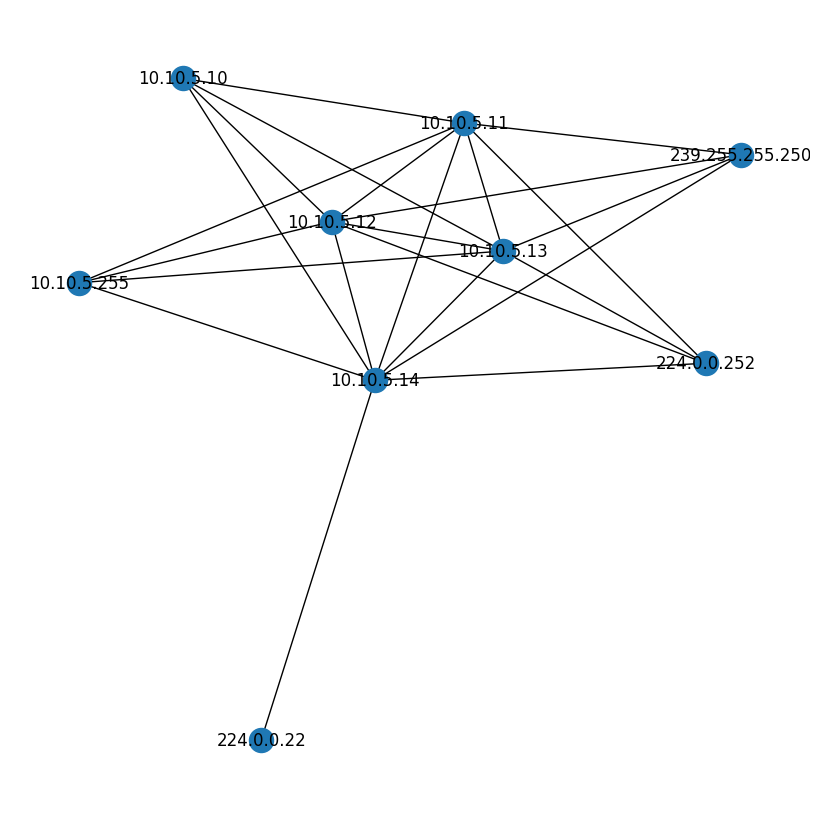

In [7]:
# Making a copy of the dataframe previously created
task6data = task5data

plt.figure(figsize=(8,8), facecolor="lightblue")

# Creating graph
graph=nx.from_pandas_edgelist(task5data, "Source", "Destination")

nx.draw(graph, with_labels=True)

plt.show()

### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [13]:
# Retrieving data
task7data = task6data

# Creating list of unique protocol values
columns = task7data["Protocol"].unique()

# Looping through columns list
for column in columns:
    task7data[column] = task7data.apply(lambda x: "True" if x.Protocol==column else "False", axis=1)

# Test print only shows NBNS
print(task7data.loc[14000])

No.                                    14001
Time                              610.061601
Source                            10.10.5.11
Destination                       10.10.5.14
Protocol                                 SMB
Length                                  4232
Info           Trans2 Request, SESSION_SETUP
TCP                                    False
NBNS                                   False
LLMNR                                  False
SSDP                                   False
HTTP                                   False
HTTP/XML                               False
BROWSER                                False
SMB                                     True
SMB Pipe                               False
NBSS                                   False
IGMPv3                                 False
SMB2                                   False
LANMAN                                 False
Name: 14000, dtype: object


### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

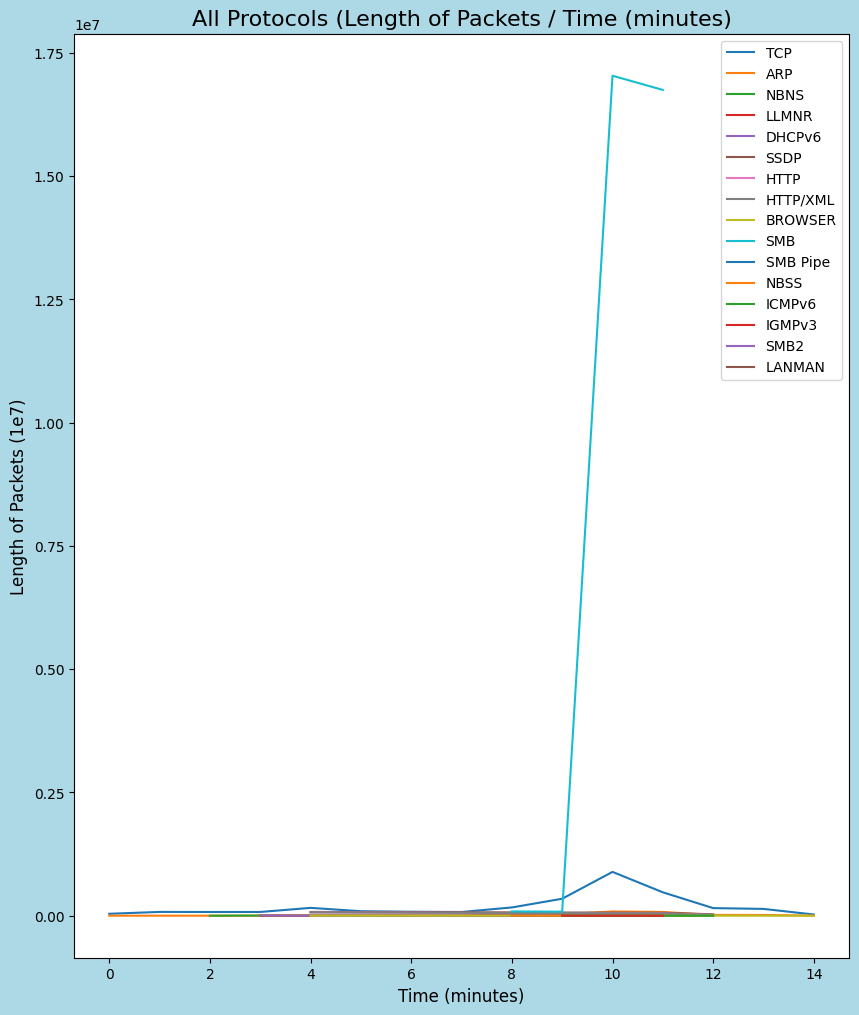

In [9]:
# Retrieving the data and creating 
t8columns = data["Protocol"].unique()

# Creating figure for graph plot
plt.figure(figsize=(10,12), facecolor="lightblue")

# Looping through columns
for column in t8columns:
    # # if statement to reduce scale so smaller values are visible
    # if column == "SMB" or column == "NBSS" or column == "TCP":
    #     continue

    # Copying dictionary values into working variable
    cf = data.copy()

    # Dropping rows != column giving protocol specific dataframe
    cf.drop(cf[cf["Protocol"]!=column].index, inplace=True)

    cf = cf[["Time", "Length"]] # Selecting time and length columns from the dataframe

    cf["Time"] = (cf["Time"]/60).round() # Converting time to minutes

    cf = cf.groupby(["Time"]).sum() # Grouping by time and calculating total packet length

    # Plotting values
    plt.plot(cf.index.values.tolist(), cf["Length"], label=column)


# Creating labels and setting size
plt.title("All Protocols (Length of Packets / Time (minutes)", fontsize=16)
plt.xlabel("Time (minutes)", fontsize=12)
plt.ylabel("Length of Packets (1e7)", fontsize=12)
plt.legend()
plt.show()
